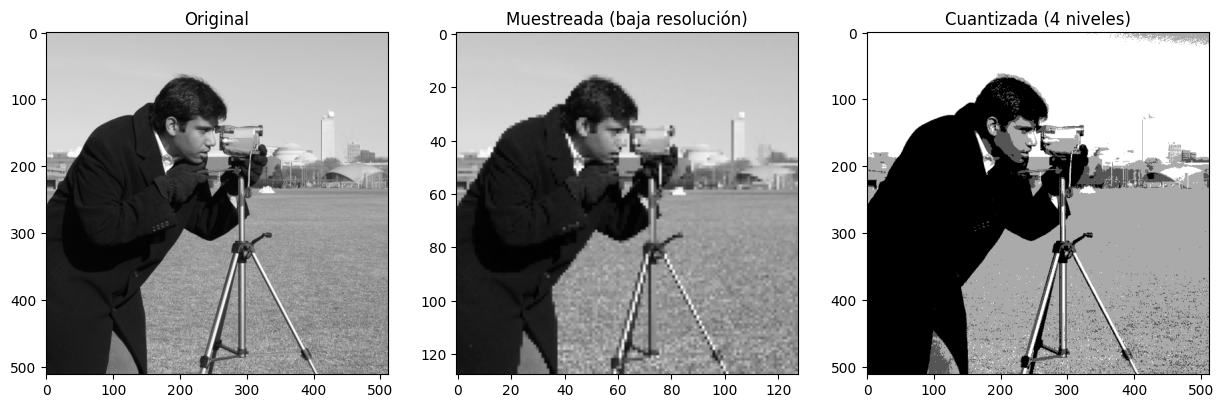

In [1]:
import numpy as np  # Importa NumPy para manipular matrices de datos numéricos
import matplotlib.pyplot as plt  # Importa Matplotlib para visualizar imágenes y gráficos
from skimage import data  # Importa imágenes de prueba desde la librería scikit-image

# Cargar imagen de ejemplo (ej. 'camera' de skimage)
imagen = data.camera()  # Carga una imagen en escala de grises de ejemplo ('camera')

# Reducción de resolución (muestreo)
imagen_muestreada = imagen[::4, ::4]  # Submuestreo cada 4 píxeles  # Aplica submuestreo: toma un píxel cada 4 filas y columnas

# Reducción de niveles de color (cuantificación)
imagen_cuantizada = (imagen // 64) * 64  # Reducción a 4 niveles (8 bits -> 2 bits)  # Reduce los niveles de color: cada 64 valores se agrupan (cuantización a 4 niveles)

# Visualización
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Crea una figura con 3 subgráficos para mostrar imágenes
ax[0].imshow(imagen, cmap='gray'); ax[0].set_title("Original")  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
ax[1].imshow(imagen_muestreada, cmap='gray'); ax[1].set_title("Muestreada (baja resolución)")  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
ax[2].imshow(imagen_cuantizada, cmap='gray'); ax[2].set_title("Cuantizada (4 niveles)")  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.show()  # Muestra la figura completa con las tres imágenes

In [2]:
from PIL import Image  # Importa PIL para guardar imágenes en distintos formatos

# Guardar en diferentes formatos
Image.fromarray(imagen).save("imagen.png")  # Sin pérdida  # Guarda la imagen como PNG (formato sin pérdida de calidad)
Image.fromarray(imagen).save("imagen.jpg", quality=30)  # Con pérdida (baja calidad)  # Guarda la imagen como JPG con compresión y pérdida de calidad

In [3]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/6/6f/Pavo_Real_Venezolano.jpg'

--2025-04-21 20:14:14--  https://upload.wikimedia.org/wikipedia/commons/6/6f/Pavo_Real_Venezolano.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7042268 (6.7M) [image/jpeg]
Saving to: ‘Pavo_Real_Venezolano.jpg’

Pavo_Real_Venezolan 100%[===================>]   6.72M  4.89MB/s    in 1.4s    

2025-04-21 20:14:16 (4.89 MB/s) - ‘Pavo_Real_Venezolano.jpg’ saved [7042268/7042268]



In [4]:
# Mostrar paleta de colores (ejemplo con imagen indexada)
imagen_paleta = Image.open("Pavo_Real_Venezolano.jpg")
imagen_paleta = imagen_paleta.convert("P", palette=Image.ADAPTIVE, colors=256)
paleta = imagen_paleta.getpalette()
print("Paleta:", imagen_paleta.getpalette())  # Lista de colores RGB

Paleta: [255, 236, 212, 255, 234, 210, 254, 233, 206, 254, 229, 202, 238, 232, 224, 251, 225, 197, 250, 222, 194, 250, 221, 189, 250, 220, 186, 241, 221, 198, 249, 218, 186, 249, 217, 181, 244, 217, 188, 246, 214, 182, 242, 210, 182, 246, 212, 178, 242, 209, 177, 241, 207, 177, 244, 210, 174, 241, 206, 173, 244, 209, 169, 242, 205, 170, 243, 205, 163, 230, 207, 184, 238, 202, 170, 239, 201, 165, 238, 199, 162, 234, 198, 164, 238, 198, 156, 234, 194, 158, 234, 193, 153, 219, 194, 170, 227, 191, 157, 228, 190, 154, 250, 199, 145, 246, 194, 138, 244, 190, 134, 234, 194, 148, 231, 189, 147, 212, 191, 145, 213, 192, 129, 229, 186, 147, 226, 186, 150, 226, 185, 144, 225, 182, 145, 222, 182, 147, 221, 178, 143, 212, 181, 149, 215, 177, 141, 236, 184, 128, 234, 176, 122, 223, 180, 134, 223, 174, 119, 218, 179, 134, 217, 173, 135, 210, 181, 127, 212, 173, 132, 213, 170, 137, 213, 169, 134, 210, 168, 133, 213, 168, 130, 210, 165, 130, 206, 166, 132, 216, 167, 119, 206, 167, 122, 207, 163, 129, 2

In [5]:
import matplotlib.pyplot as plt  # Importa Matplotlib para visualizar imágenes y gráficos

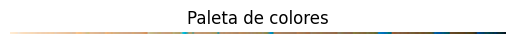

In [6]:
# Crea una imagen con la paleta
paleta_imagen = np.array(paleta).reshape(-1, 3)
paleta_imagen = paleta_imagen[np.newaxis, :, :]  # Agrega una dimensión extra

# Muestra la imagen
plt.imshow(paleta_imagen)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.axis('off')  # Oculta los ejes
plt.title("Paleta de colores")
plt.show()  # Muestra la figura completa con las tres imágenes

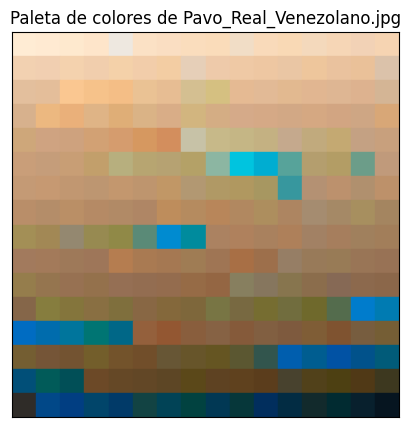

In [7]:
# Convertir la paleta a una matriz NumPy
paleta_array = np.array(paleta).reshape(-1, 3)

# Calcular dimensiones de la cuadrícula (ajusta según la cantidad de colores)
num_colores = paleta_array.shape[0]
filas = int(num_colores**0.5)  # Raíz cuadrada para una cuadrícula cuadrada
columnas = int(np.ceil(num_colores / filas))

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(5, 5))  # Ajusta el tamaño según sea necesario  # Crea una figura con 3 subgráficos para mostrar imágenes

# Iterar sobre los colores y crear cuadrados en la cuadrícula
for i, color in enumerate(paleta_array):
    fila = i // columnas
    columna = i % columnas
    # Crea un rectángulo con el color actual
    rect = plt.Rectangle((columna, fila), 1, 1, color=color / 255)  # Normaliza color a 0-1
    ax.add_patch(rect)

# Configurar la visualización
ax.set_xlim(0, columnas)
ax.set_ylim(0, filas)
ax.set_xticks([])  # Oculta las marcas de los ejes
ax.set_yticks([])
ax.invert_yaxis()  # Invierte el eje y para que el primer color esté arriba
plt.title("Paleta de colores de Pavo_Real_Venezolano.jpg")
plt.show()  # Muestra la figura completa con las tres imágenes

Brillo: 129.06, Contraste: 73.64


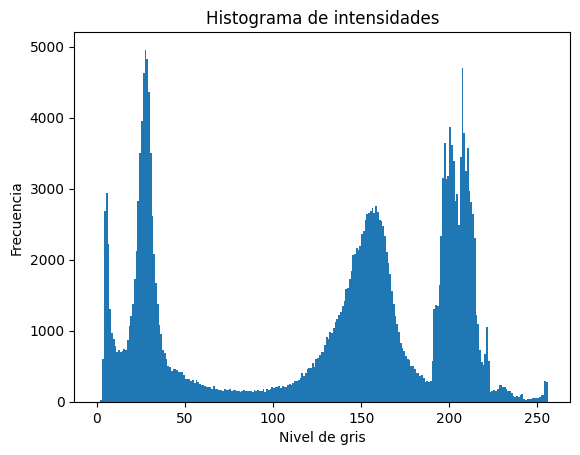

In [8]:
# Cálculo de brillo y contraste
brillo = np.mean(imagen)
contraste = np.std(imagen)
print(f"Brillo: {brillo:.2f}, Contraste: {contraste:.2f}")

# Histograma
plt.hist(imagen.ravel(), bins=256, range=(0, 256))
plt.title("Histograma de intensidades")
plt.xlabel("Nivel de gris"); plt.ylabel("Frecuencia")
plt.show()  # Muestra la figura completa con las tres imágenes

np.mean(imagen) calcula el promedio de todos los valores de la imagen, es decir, mide el brillo promedio.

**Si el valor es bajo (cerca de 0), la imagen es más oscura.**

**Si el valor es alto (cerca de 255 en imágenes de 8 bits), la imagen es más brillante.**

np.std(imagen) calcula el desvío estándar de los valores de la imagen, que es una medida del contraste.

**Un contraste alto implica que hay una gran diferencia entre las zonas claras y oscuras.**

**Un contraste bajo implica que los valores de los píxeles están todos muy cercanos entre sí (imagen "lavada" o "apagada").**

**El histograma describe visualmente:**

*Si la imagen está oscura (más píxeles a la izquierda).*

*Si está clara (más píxeles a la derecha).*

*Si tiene buen contraste (el histograma ocupa todo el rango) o poco contraste (el histograma está concentrado en una zona)*

In [9]:
imagen = data.coffee()

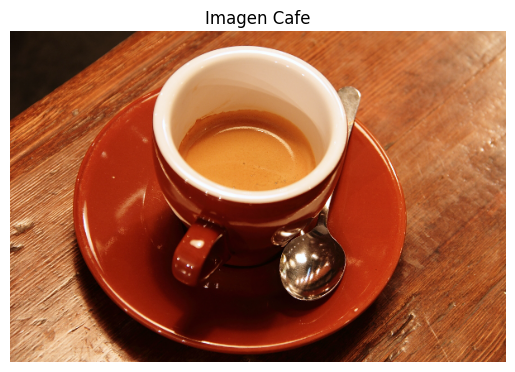

In [10]:
plt.imshow(imagen)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.axis('off')
plt.title("Imagen Cafe")
plt.show()  # Muestra la figura completa con las tres imágenes

In [11]:
images = {
    "Camera": data.camera(),  # Carga una imagen en escala de grises de ejemplo ('camera')
    "Moon": data.moon(),
    "Text": data.text(),
    "Coins": data.coins(),
    "Coffe": data.coffee()
}

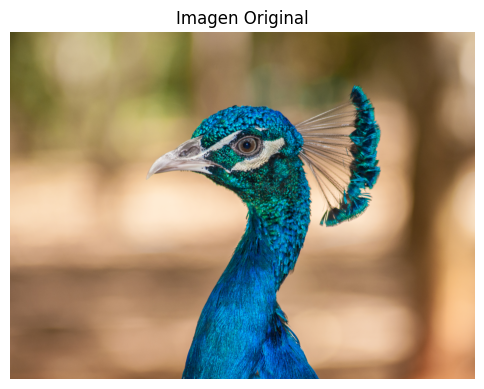

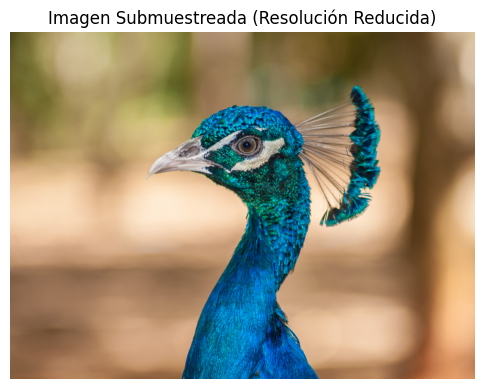

In [13]:
# Importar bibliotecas necesarias
from PIL import Image  # Importa PIL para guardar imágenes en distintos formatos
import numpy as np  # Importa NumPy para manipular matrices de datos numéricos
import matplotlib.pyplot as plt  # Importa Matplotlib para visualizar imágenes y gráficos

# Cargar una imagen de ejemplo
imagen = Image.open("Pavo_Real_Venezolano.jpg") # Reemplazar con tu imagen

# Convertir la imagen a una matriz NumPy
imagen_np = np.array(imagen)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(imagen_np)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.title("Imagen Original")
plt.axis('off') # Para no mostrar los ejes

# Reducir la resolución (submuestreo)
factor_reduccion = 2  # Reducir a la mitad
nueva_altura = imagen_np.shape[0] // factor_reduccion
nuevo_ancho = imagen_np.shape[1] // factor_reduccion

imagen_submuestreada = Image.fromarray(imagen_np).resize((nuevo_ancho, nueva_altura))
imagen_submuestreada_np = np.array(imagen_submuestreada)

# Mostrar la imagen submuestreada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_submuestreada_np)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.title("Imagen Submuestreada (Resolución Reducida)")
plt.axis('off')
plt.show()  # Muestra la figura completa con las tres imágenes

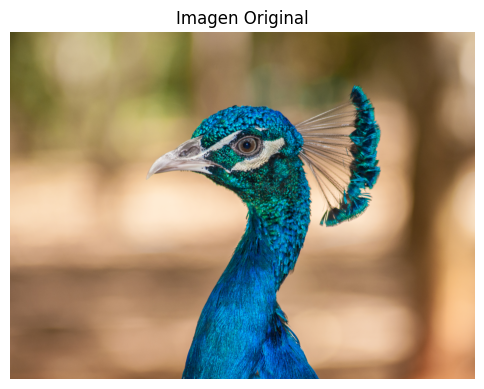

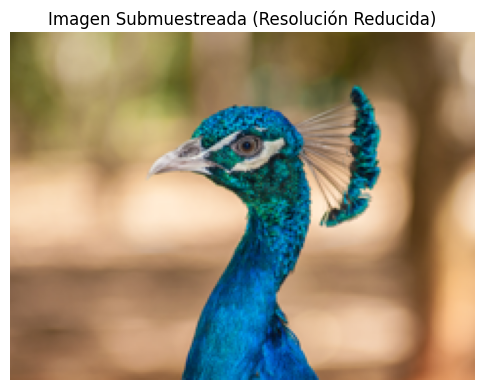

In [20]:
# Importar bibliotecas necesarias
from PIL import Image  # Importa PIL para guardar imágenes en distintos formatos
import numpy as np  # Importa NumPy para manipular matrices de datos numéricos
import matplotlib.pyplot as plt  # Importa Matplotlib para visualizar imágenes y gráficos

# Cargar una imagen de ejemplo
imagen = Image.open("Pavo_Real_Venezolano.jpg") # Reemplazar con tu imagen

# Convertir la imagen a una matriz NumPy
imagen_np = np.array(imagen)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(imagen_np)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.title("Imagen Original")
plt.axis('off') # Para no mostrar los ejes

# Reducir la resolución (submuestreo)
factor_reduccion =16 # Reducir a la mitad
nueva_altura = imagen_np.shape[0] // factor_reduccion
nuevo_ancho = imagen_np.shape[1] // factor_reduccion

imagen_submuestreada = Image.fromarray(imagen_np).resize((nuevo_ancho, nueva_altura))
imagen_submuestreada_np = np.array(imagen_submuestreada)

# Mostrar la imagen submuestreada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_submuestreada_np)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.title("Imagen Submuestreada (Resolución Reducida)")
plt.axis('off')
plt.show()  # Muestra la figura completa con las tres imágenes

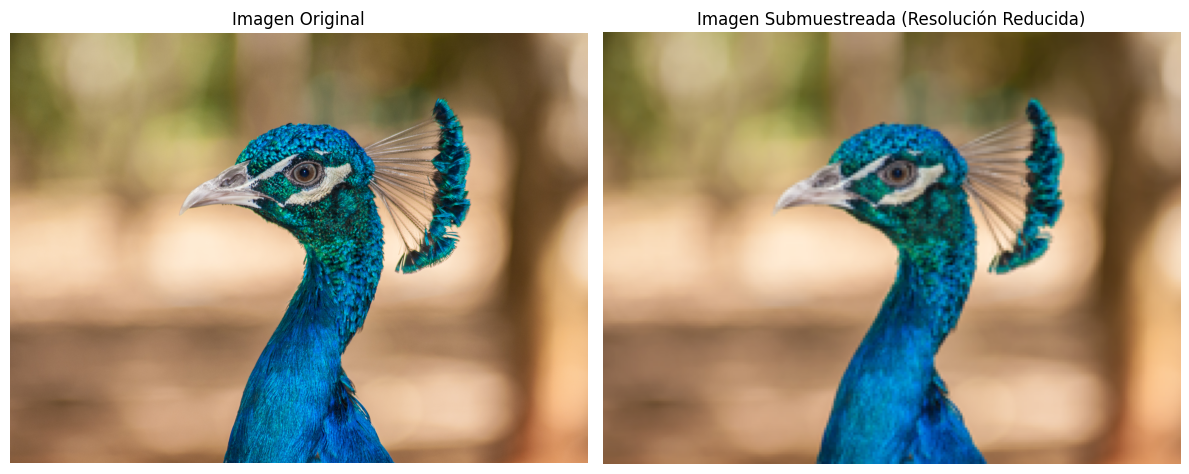

In [22]:
# Crear una figura con dos subplots horizontales (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta figsize según sea necesario

# Mostrar la imagen original en el primer subplot
axes[0].imshow(imagen_np)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
axes[0].set_title("Imagen Original")  # Asigna un título a cada imagen para identificarla
axes[0].axis('off')

# Mostrar la imagen submuestreada en el segundo subplot
axes[1].imshow(imagen_submuestreada_np) # Aqui fue donde se cambio  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
axes[1].set_title("Imagen Submuestreada (Resolución Reducida)")  # Asigna un título a cada imagen para identificarla
axes[1].axis('off')

# Ajustar el espacio entre los subplots (opcional)
plt.tight_layout()

**Con un factor de reduccion de 16 se empieza a notar la pérdida de informacion en la imagen con mayor claridad**

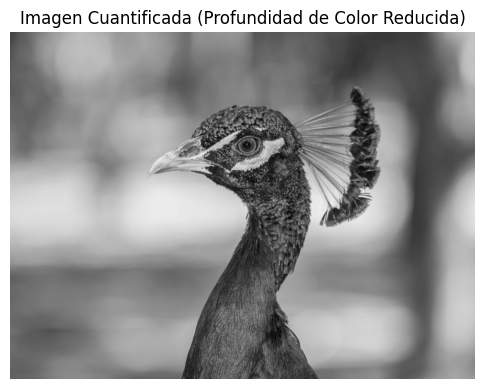

In [28]:
# Reducir la profundidad de color (cuantificación)
profundidad_color_reducida = 64 # Ejemplo: 64 niveles de gris

from skimage.color import rgb2gray
imagen_gris = rgb2gray(imagen_np)  # Devuelve valores de 0 a 1, tendrías que convertir a 0-255
imagen_gris = (imagen_gris * 255).astype(np.uint8)

imagen_cuantificada = imagen_gris // (256 // profundidad_color_reducida) * (256 // profundidad_color_reducida)

# Mostrar la imagen cuantificada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_cuantificada, cmap='gray', vmin=0, vmax=255) # cmap='gray' para escala de grises  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
plt.title("Imagen Cuantificada (Profundidad de Color Reducida)")
plt.axis('off')
plt.show()  # Muestra la figura completa con las tres imágenes

Entonces, los valores de gris se redondean al múltiplo de 4 más cercano hacia abajo:

0–3 se convierten en 0

4–7 se convierten en 4

8–11 se convierten en 8

...

252–255 se convierten en 252

In [24]:
im = Image.open('Pavo_Real_Venezolano.jpg')

In [25]:
print(im.width, im.height, im.mode, im.format, type(im))

3819 2848 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


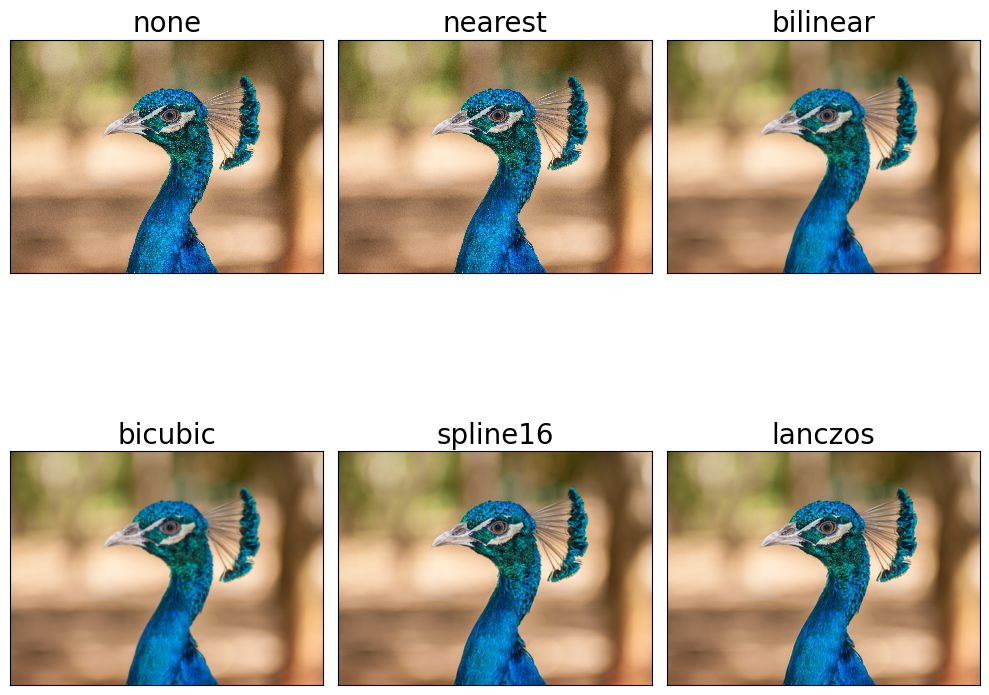

In [26]:
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for ax, interp_method in zip(axes.flat, methods):
 ax.imshow(im, interpolation=interp_method)  # Muestra una imagen en escala de grises en una de las posiciones del gráfico
 ax.set_title(str(interp_method), size=20)  # Asigna un título a cada imagen para identificarla
plt.tight_layout()
plt.show()  # Muestra la figura completa con las tres imágenes